In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('libraries')

libraries


In [4]:
df=pd.read_csv(r'C:\Users\Meghana c\OneDrive\Desktop\employee_attrition_dirty_10000.csv')
df

,EmployeeID,Name,Age,Gender,Department,Salary,Experience,JoinDate,Attrition,PerformanceScore
0,1,Priya Kumar,58.0,male,Sales,40795,14,2017-03-26,Yes,3.0
1,2,Priya Sharma,27.0,female,IT,101820,6,2014-05-30,Yes,2.0
2,3,Rahul Singh,38.0,FEMALE,SALES,62194,10,2007-03-04,No,5.0
3,4,Anil Singh,55.0,FEMALE,SALES,85263,23,2018-11-15,Yes,3.0
4,5,Priya Kumar,41.0,FEMALE,HR,89820,1,2013-07-11,No,4.0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Rahul Singh,NaN,FEMALE,finance,69938,12,2013-07-19,Yes,4.0
9996,9997,Kavya Singh,44.0,FEMALE,SALES,113383,4,2011-09-12,Yes,5.0
9997,9998,Rahul Sharma,52.0,male,Finance,29886,23,2013-10-09,No,1.0
9998,9999,Rahul Reddy,50.0,female,HR,72193,22,2015-11-09,Yes,1.0


In [5]:
print(df.shape)
print(df.info())
print(df.describe())

(10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        10000 non-null  int64  
 1   Name              10000 non-null  object 
 2   Age               9884 non-null   float64
 3   Gender            10000 non-null  object 
 4   Department        10000 non-null  object 
 5   Salary            10000 non-null  int64  
 6   Experience        10000 non-null  int64  
 7   JoinDate          10000 non-null  object 
 8   Attrition         10000 non-null  object 
 9   PerformanceScore  9899 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB
None
        EmployeeID          Age         Salary    Experience  PerformanceScore
count  10000.00000  9884.000000   10000.000000  10000.000000       9899.000000
mean    5000.50000    40.705180   79182.994800     11.916700          3.019295
std     28

In [13]:
print('age=',10000-9884)
print('performancescore=',10000-9899)

age= 116
performancescore= 101


In [14]:
df['JoinDate']=pd.to_datetime(df['JoinDate'], errors='coerce') #error='coerce'=if pandas finds any value it cannot convert into proper data format
                                                                 # it will replace it with NaT(Not a Time like NaN for dates) (missing datatime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EmployeeID        10000 non-null  int64         
 1   Name              10000 non-null  object        
 2   Age               9884 non-null   float64       
 3   Gender            10000 non-null  object        
 4   Department        10000 non-null  object        
 5   Salary            10000 non-null  int64         
 6   Experience        10000 non-null  int64         
 7   JoinDate          9778 non-null   datetime64[ns]
 8   Attrition         10000 non-null  object        
 9   PerformanceScore  9899 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 781.4+ KB


In [18]:
#fix data format
df['JoinDate']=pd.to_datetime(df['JoinDate'],format='mixed', errors='coerce') #format='%d-%m-%y' or '%m-%d-%y'

In [19]:
df['JoinDate'].isnull().sum()

np.int64(222)

In [39]:
df=df[(df['Age']>=18) & (df['Age']<=60)].copy()

In [27]:
df.loc[df['Experience']<0,'Experience']= np.nan  #convert negative to NaN

In [29]:
df['Experience'].fillna(df['Experience'].median())  #fill with median

0       14.0
1        6.0
2       10.0
3       23.0
4        1.0
        ... 
9994    21.0
9996     4.0
9997    23.0
9998    22.0
9999    10.0
Name: Experience, Length: 9777, dtype: float64

In [30]:
df['Experience'].describe()

count    9777.000000
mean       12.070472
std         7.183391
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        24.000000
Name: Experience, dtype: float64

In [31]:
q1=df['Salary'].quantile(0.25)
q3=df['Salary'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit, upper_limit)

-25663.5 171484.5


In [37]:
df['Salary'].clip(lower_limit,upper_limit)  #clip()=restrict values within a boundry means value stay between upper and lower limit

0        40795.0
1       101820.0
2        62194.0
3        85263.0
4        89820.0
          ...   
9994     64208.0
9996    113383.0
9997     29886.0
9998     72193.0
9999     69765.0
Name: Salary, Length: 9777, dtype: float64

In [34]:
df['Salary'].describe()

count      9777.000000
mean      79174.368007
std       70889.214574
min       25015.000000
25%       48267.000000
50%       72743.000000
75%       97554.000000
max      700000.000000
Name: Salary, dtype: float64

In [35]:
print('lower:', lower_limit)
print('upper:', upper_limit)

lower: -25663.5
upper: 171484.5


In [40]:
df['Salary']=df['Salary'].clip(lower_limit, upper_limit)

In [41]:
df['Salary'].max()

171484.5

In [42]:
df['Salary'].describe()

count      9777.000000
mean      73390.266697
std       29437.222190
min       25015.000000
25%       48267.000000
50%       72743.000000
75%       97554.000000
max      171484.500000
Name: Salary, dtype: float64

In [43]:
#standardize Gender
df['Gender']=df['Gender'].str.strip().str.lower().str.capitalize()
df['Gender'].unique()
#hear, .str.strip()= removes extra spaces from beginning and end
#.str.lower()= converts everything to lowercase
#.str.capitalize()= capitalizes first letter only eq:- Female
#.str allows us to apply string operations on entire column  without .str python thinks it's numeric

array(['Male', 'Female'], dtype=object)

In [44]:
df['Gender'].head

<bound method NDFrame.head of 0         Male
1       Female
2       Female
3       Female
4       Female
         ...  
9994    Female
9996    Female
9997      Male
9998    Female
9999      Male
Name: Gender, Length: 9777, dtype: object>

In [45]:
# standardize Department
df['Department'].unique()

array(['Sales', 'IT', 'SALES', 'HR', 'Finance', 'finance', 'It'],
      dtype=object)

In [47]:
df['Department']=df['Department'].str.strip().str.lower()
df['Department']=df['Department'].replace({'Sales':'Sales',
                                           'hr':'HR',
                                           'it':'IT',
                                           'finance':'Finance'})

In [ ]:
# if i want to change multiple thing like Hr,hr,hR,HR to HR
# first normalize it(lower case)
#**** df['Department']=df['Department'].str.strip().str.lower()
#then map to correct format (above code 47)

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df['EmployeeID'].duplicated().sum()

np.int64(0)

In [50]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

# how to check data is cleaned

In [51]:
#check missing value
df.isnull().sum()

EmployeeID            0
Name                  0
Age                   0
Gender                0
Department            0
Salary                0
Experience            0
JoinDate            220
Attrition             0
PerformanceScore     99
dtype: int64

In [52]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9777 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EmployeeID        9777 non-null   int64         
 1   Name              9777 non-null   object        
 2   Age               9777 non-null   float64       
 3   Gender            9777 non-null   object        
 4   Department        9777 non-null   object        
 5   Salary            9777 non-null   float64       
 6   Experience        9777 non-null   float64       
 7   JoinDate          9557 non-null   datetime64[ns]
 8   Attrition         9777 non-null   object        
 9   PerformanceScore  9678 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 840.2+ KB


In [53]:
#check logical Ranges
df.describe()

,EmployeeID,Age,Salary,Experience,JoinDate,PerformanceScore
count,9777.000000,9777.000000,9777.000000,9777.000000,9557,9678.000000
mean,5005.956735,39.509052,73390.266697,12.070472,2014-06-30 18:06:31.001360128,3.019632
min,1.000000,20.000000,25015.000000,0.000000,2005-01-01 00:00:00,1.000000
25%,2510.000000,30.000000,48267.000000,6.000000,2009-09-20 00:00:00,2.000000
50%,5012.000000,40.000000,72743.000000,12.000000,2014-07-01 00:00:00,3.000000
75%,7505.000000,49.000000,97554.000000,18.000000,2019-04-03 00:00:00,4.000000
max,10000.000000,59.000000,171484.500000,24.000000,2024-03-02 00:00:00,5.000000
std,2887.770024,11.479904,29437.222190,7.183391,NaN,1.419184


In [55]:
#check categorical Consistency
print(df['Gender'].unique())
print(df['Department'].unique())
print(df['Attrition'].unique())

['Male' 'Female']
['sales' 'IT' 'HR' 'Finance']
['Yes' 'No']


In [57]:
#check Duplicates
print(df.duplicated().sum())
print(df['EmployeeID'].duplicated().sum())

0
0


<Axes: >

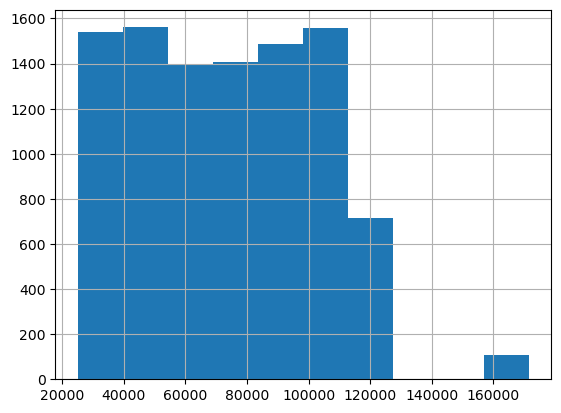

In [58]:
#quick distribution check(optional)
df['Salary'].hist()

In [59]:
#drop missing value withjoindate
df=df.dropna(subset=['JoinDate'])

In [60]:
df.isnull().sum()

EmployeeID           0
Name                 0
Age                  0
Gender               0
Department           0
Salary               0
Experience           0
JoinDate             0
Attrition            0
PerformanceScore    97
dtype: int64

In [62]:
df['PerformanceScore'].fillna(df['PerformanceScore'].median())

0       3.0
1       2.0
2       5.0
3       3.0
4       4.0
       ... 
9994    1.0
9996    5.0
9997    1.0
9998    1.0
9999    3.0
Name: PerformanceScore, Length: 9557, dtype: float64

In [63]:
df.isnull().sum()

EmployeeID          0
Name                0
Age                 0
Gender              0
Department          0
Salary              0
Experience          0
JoinDate            0
Attrition           0
PerformanceScore    0
dtype: int64

In [64]:
print(df.isnull().sum())
print(df.info())
print(df.describe())

EmployeeID          0
Name                0
Age                 0
Gender              0
Department          0
Salary              0
Experience          0
JoinDate            0
Attrition           0
PerformanceScore    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9557 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EmployeeID        9557 non-null   int64         
 1   Name              9557 non-null   object        
 2   Age               9557 non-null   float64       
 3   Gender            9557 non-null   object        
 4   Department        9557 non-null   object        
 5   Salary            9557 non-null   float64       
 6   Experience        9557 non-null   float64       
 7   JoinDate          9557 non-null   datetime64[ns]
 8   Attrition         9557 non-null   object        
 9   PerformanceScore  9557 non-null   float64       
dtypes: datetime6

In [65]:
df.to_csv('employee_cleaned.csv', index=False)